In [5]:
#the main aim is to develop a machine learning model using linear regression to accurately predict the box office.csv
#the model will be trained on data sets
#
#specific objectives
#1.build a predictive model that can estimate the expected revenue of movie
#2.provide insights into which features most influence the box offive success
#3.compare linear regression performance with advanced models
#
'''
1. STEP 1
import the libraries and data sets e.g pandas ,numpy, matplotlib etc
2.Step2
preproccessing and modelling
a) train test split
b)labelencoder
c)standard scaler :scales faetures for better model performance
d)count vectorizer : converts text data into numerical format
e)metrics: offers tools for evaluating model accuracy
 Advanced modelling
 xgboost a high performance gradient boosting library
  Utility 
  warning .filterwarnings("ignore") to suppress warnings
  '''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 2.9 MB/s eta 0:00:53
   ---------------------------------------- 1.8/150.0 MB 4.2 MB/s eta 0:00:36
    --------------------------------------- 2.9/150.0 MB 4.2 MB/s eta 0:00:36
   - -------------------------------------- 3.9/150.0 MB 4.4 MB/s eta 0:00:33
   - -------------------------------------- 5.0/150.0 MB 4.7 MB/s eta 0:00:31
   - -------------------------------------- 6.0/150.0 MB 4.8 MB/s eta 0:00:31
   - -------------------------------------- 7.3/150.0 MB 4.8 MB/s eta 0:00:30
   -- ------------------------------------- 8.1/150.0 MB 4.7 MB/s eta 0:00:31
   -- ------------------------------------- 8.7/150.0 MB 4.8 MB/s eta 0:00:30
   -- ------------------------------------- 10.5/150.0 MB 4.8 MB/s eta 0:00:29
   ---

In [4]:
%pip show xgboost

Name: xgboost
Version: 3.0.2
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: c:\Users\SEBABE\AppData\Local\Programs\Python\Python313\Lib\site-packages
Requires: numpy, scipy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('boxoffice.csv')
df.tail()

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
2689,X-Men,38153242,47601900,Disney,140965221,3532,106955513,G,Comedy,92
2690,The Matrix,63305093,252473529,Disney,190634982,3171,111238142,PG-13,Comedy,156
2691,Forrest Gump,271758510,524896297,Disney,112771730,2450,112364620,NC-17,Drama,146
2692,Jaws,268259149,791515453,Disney,194172443,661,172229703,G,Thriller,170
2693,Interstellar,158336835,77904664,Universal,132903825,3914,93959844,PG-13,Comedy,170


In [10]:
df.head(2000)
# i need the last five


,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
0,The Avengers,6026491,1274885664,Warner Bros.,163620146,253,174687337,R,Animation,16
1,Titanic,169411543,1132871091,Disney,85549990,122,103948486,G,Action,103
2,Jurassic Park,107836098,583329845,Sony,55681429,3826,122104991,NC-17,Horror,89
3,Avatar,51433697,1225323391,Disney,109775324,3868,46431596,G,Horror,85
4,The Lion King,142791649,604140729,Warner Bros.,59476800,2934,203513696,R,Comedy,158
...,...,...,...,...,...,...,...,...,...,...
1995,Finding Nemo,199049507,1015184179,Warner Bros.,2492645,2777,159445822,R,Horror,75
1996,Black Panther,9904511,664747063,Paramount,193766417,441,215808408,G,Horror,96
1997,The Godfather,218984969,1443524722,Disney,87357026,2054,235950338,G,Drama,118
1998,Spider-Man,156736019,217513743,Warner Bros.,168894246,972,173885508,R,Animation,161


In [8]:
#checking dataset size
df.shape

(2694, 10)

In [9]:
#checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             2694 non-null   object
 1   domestic_revenue  2694 non-null   int64 
 2   world_revenue     2694 non-null   int64 
 3   distributor       2694 non-null   object
 4   opening_revenue   2694 non-null   int64 
 5   opening_theaters  2694 non-null   int64 
 6   budget            2694 non-null   int64 
 7   MPAA              2694 non-null   object
 8   genres            2694 non-null   object
 9   release_days      2694 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 210.6+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
domestic_revenue,2694.0,1.508539e+08,8.579997e+07,827765.0,7.673272e+07,152572473.5,2.247314e+08,2.998107e+08
world_revenue,2694.0,7.719177e+08,4.284414e+08,3261301.0,3.991135e+08,766555142.5,1.143920e+09,1.499310e+09
opening_revenue,2694.0,9.971321e+07,5.721762e+07,138569.0,5.033848e+07,99814175.0,1.489805e+08,1.999336e+08
opening_theaters,2694.0,2.263039e+03,1.298559e+03,10.0,1.161000e+03,2271.5,3.392250e+03,4.499000e+03
budget,2694.0,1.537996e+08,8.557624e+07,5197977.0,7.861876e+07,156256716.0,2.274832e+08,2.998597e+08
release_days,2694.0,9.089755e+01,5.089404e+01,1.0,4.700000e+01,91.0,1.350000e+02,1.790000e+02


In [13]:
# drop world_revenue column
df = df.drop(columns=['world_revenue'])

In [14]:
df.isnull().sum() * 100 


title               0
domestic_revenue    0
distributor         0
opening_revenue     0
opening_theaters    0
budget              0
MPAA                0
genres              0
release_days        0
dtype: int64

In [15]:
df.isnull().sum() * 100 / df.shape[0]

title               0.0
domestic_revenue    0.0
distributor         0.0
opening_revenue     0.0
opening_theaters    0.0
budget              0.0
MPAA                0.0
genres              0.0
release_days        0.0
dtype: float64

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
domestic_revenue,2694.0,1.508539e+08,8.579997e+07,827765.0,76732721.25,152572473.5,2.247314e+08,299810741.0
opening_revenue,2694.0,9.971321e+07,5.721762e+07,138569.0,50338484.25,99814175.0,1.489805e+08,199933639.0
opening_theaters,2694.0,2.263039e+03,1.298559e+03,10.0,1161.00,2271.5,3.392250e+03,4499.0
budget,2694.0,1.537996e+08,8.557624e+07,5197977.0,78618761.50,156256716.0,2.274832e+08,299859703.0
release_days,2694.0,9.089755e+01,5.089404e+01,1.0,47.00,91.0,1.350000e+02,179.0


In [17]:
display(df.to_string)

<bound method DataFrame.to_string of               title  domestic_revenue   distributor  opening_revenue  \
0      The Avengers           6026491  Warner Bros.        163620146   
1           Titanic         169411543        Disney         85549990   
2     Jurassic Park         107836098          Sony         55681429   
3            Avatar          51433697        Disney        109775324   
4     The Lion King         142791649  Warner Bros.         59476800   
...             ...               ...           ...              ...   
2689          X-Men          38153242        Disney        140965221   
2690     The Matrix          63305093        Disney        190634982   
2691   Forrest Gump         271758510        Disney        112771730   
2692           Jaws         268259149        Disney        194172443   
2693   Interstellar         158336835     Universal        132903825   

      opening_theaters     budget   MPAA     genres  release_days  
0                  253  174687

In [19]:
display(df.to_string())

'                         title  domestic_revenue   distributor  opening_revenue  opening_theaters     budget   MPAA     genres  release_days\n0                 The Avengers           6026491  Warner Bros.        163620146               253  174687337      R  Animation            16\n1                      Titanic         169411543        Disney         85549990               122  103948486      G     Action           103\n2                Jurassic Park         107836098          Sony         55681429              3826  122104991  NC-17     Horror            89\n3                       Avatar          51433697        Disney        109775324              3868   46431596      G     Horror            85\n4                The Lion King         142791649  Warner Bros.         59476800              2934  203513696      R     Comedy           158\n5                    Star Wars         283757629     Universal         17256584              1216   39257068      R     Comedy           154\n6    

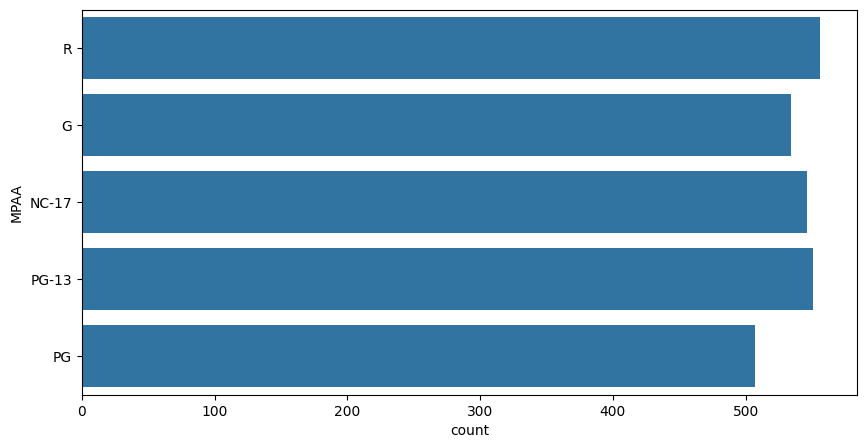

In [23]:
plt.figure(figsize=(10,5))
sb.countplot(df['MPAA'])
plt.show()

In [24]:
df['domestic_revenue'] = df['domestic_revenue'].astype(str).str[1:]

for col in ['domestic_revenue', 'opening_theaters', 'release_days']:
    df[col] = df[col].astype(str).str.replace(',', '') 
    
    temp = (~df[col].isnull()) 
    df[temp][col] = df[temp][col].convert_dtypes(float) 

    df[col] = pd.to_numeric(df[col], errors='coerce')

